In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Linear Regression.xlsx')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [4]:
df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


<AxesSubplot:xlabel='price'>

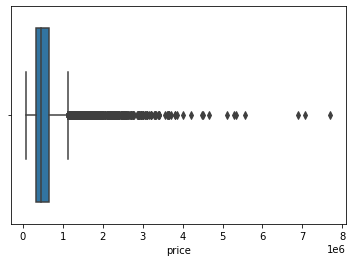

In [7]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='sqft_living'>

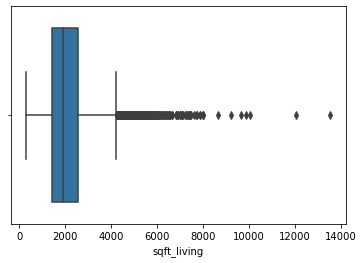

In [8]:
sns.boxplot(df['sqft_living'])

<AxesSubplot:xlabel='bedrooms'>

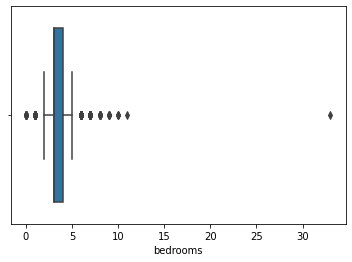

In [9]:
sns.boxplot(df['bedrooms'])

<AxesSubplot:xlabel='bathrooms'>

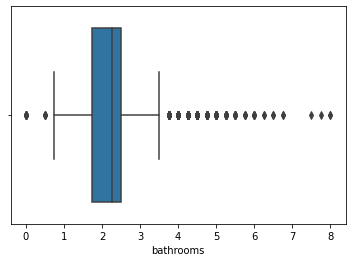

In [10]:
sns.boxplot(df['bathrooms'])

<AxesSubplot:xlabel='floors'>

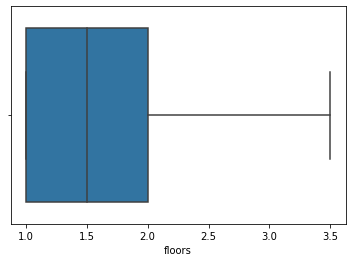

In [11]:
sns.boxplot(df['floors'])

__Inference__

In this dataset ___price___ and ___area of living in square feet__ have many outliers.
___bedrooms___ and ___bathrooms___ have moderate outliers.
___floors___ have no outliers.

In [12]:
df.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


<AxesSubplot:>

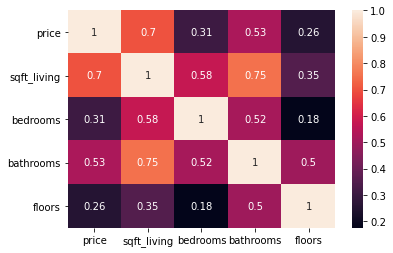

In [13]:
sns.heatmap(df.corr(), annot=True)

__Inference__

Here we see that ___price___ and ___area of living in square feet___ have a good correlation.

# Spliting data into training and testing 

In [14]:
x = df[['sqft_living','bedrooms','bathrooms','floors']]
y = df.price

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

# Creating Model

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.coef_

array([   309.11099034, -57550.54119311,   8440.49060067,  -1165.39355228])

In [19]:
lr.intercept_

76097.63298339408

# Testing

In [20]:
pred = lr.predict(x_test)
pred

array([608095.96846158, 585712.20079791, 416482.58364346, ...,
       683810.03201802, 221742.65972713, 426849.61955589])

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)
print("RMSE : ",rmse)
print("R_square : ",r2)

RMSE :  259763.19584802483
R_square :  0.5166693554435362


__Inference__

 r-squared tells how well the regression model fits the observed data.
 Here, only 51% of the data fit the regression model.